In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from pathlib import Path
import os

# don't know if this still works
    
def show_images(model_type, images_path, csv_path):
    df = pd.read_csv(csv_path).sort_values('rmse')
    df = pd.concat([df.head(1), df.tail(1)])
    base_dir = Path(images_path)

    for _, row in df.iterrows():
        model = row['model']
        sample = row['sample']
        day = row['day']
        rmse = row['rmse']
        
        true_path = base_dir / f"{model}/sample{sample}_day{day}_true.png"
        pred_path = base_dir / f"{model}/sample{sample}_day{day}_pred.png"
        
        if not true_path.exists() or not pred_path.exists():
            print(f"Missing images for {model} sample{sample} day{day}")
            continue
        
        true_img = mpimg.imread(true_path)
        pred_img = mpimg.imread(pred_path)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
        plt.subplots_adjust(wspace=0.3, top=0.85, bottom=0.15)
        
        ax1.imshow(true_img)
        ax1.axis('off')
        ax1.set_title('Truth', fontsize=8)
        
        ax2.imshow(pred_img)
        ax2.axis('off')
        ax2.set_title('Prediction', fontsize=8)
        
        fig.suptitle(f"{model_type}-{model} day{day} RMSE: {rmse:.4f}", 
                    fontsize=10, y=0.05, va='bottom')
        
        plt.show()
        plt.close()

In [28]:
# don't know if this still works
models=['CNN', 'LSTM', 'LSTM_bidirectional']
for model in models:
    show_images(model, f"/s/bach/b/class/cs535/cs535a/data/eval_results/{model}", f"/s/chopin/n/under/voleskyj/cs535_project/analysis/csvs/{model.lower()}.csv")
    print('-----------------------------------------------------------------------------------------------')

Missing images for 1Day sample1 day5
Missing images for 1Day sample0 day4
-----------------------------------------------------------------------------------------------
Missing images for 8Day sample0 day3
Missing images for 4Day sample1 day4
-----------------------------------------------------------------------------------------------
Missing images for 8Day sample2 day1
Missing images for 1Day sample1 day7
-----------------------------------------------------------------------------------------------


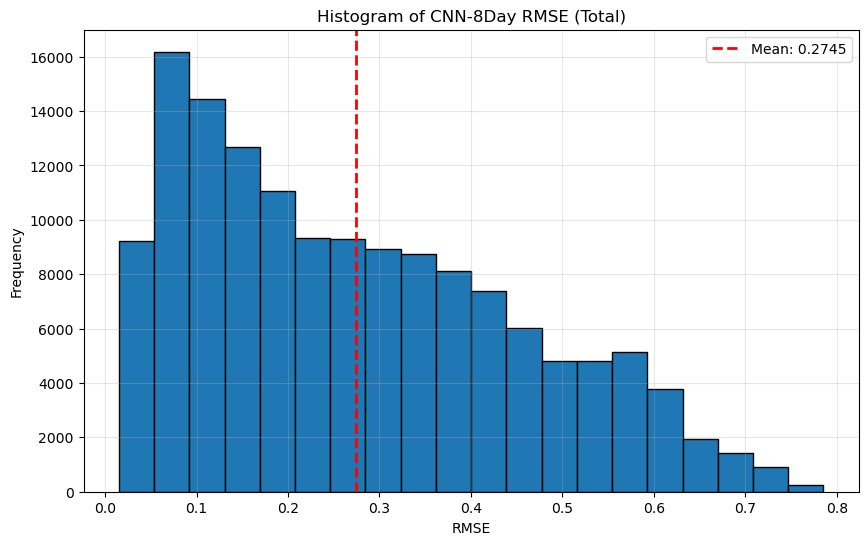

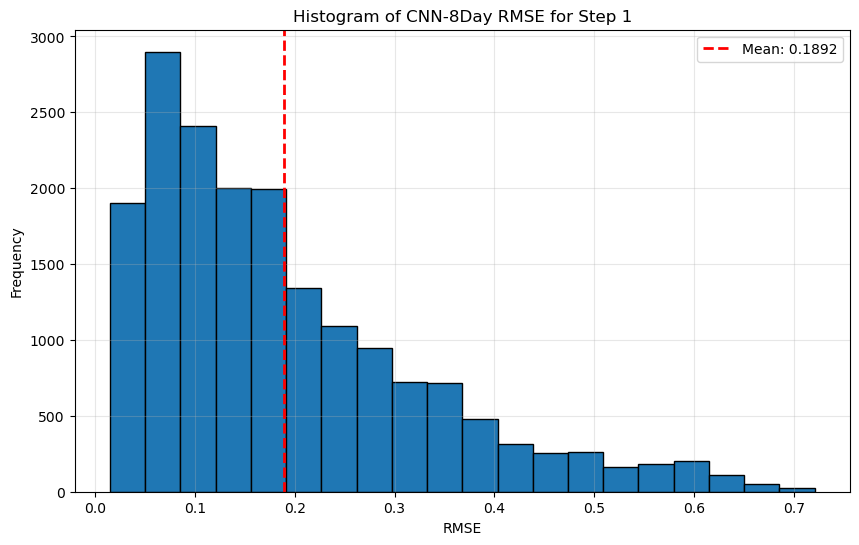

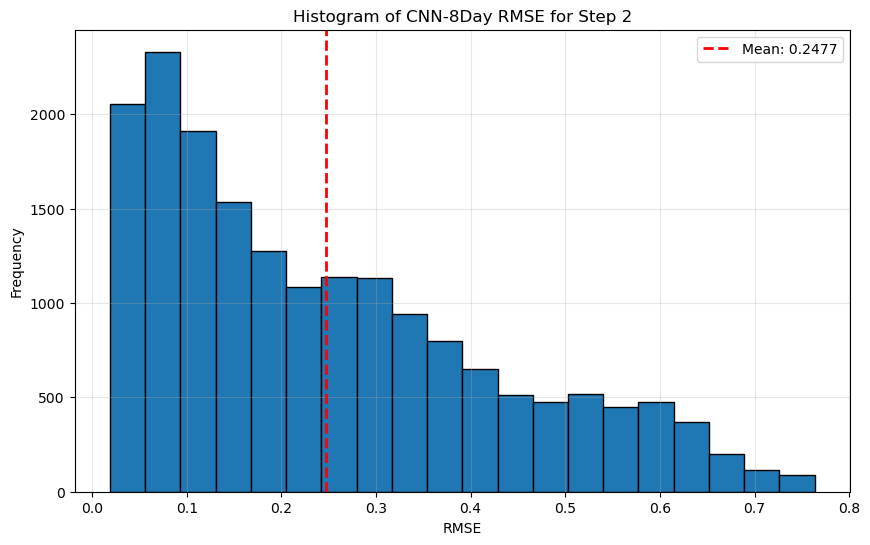

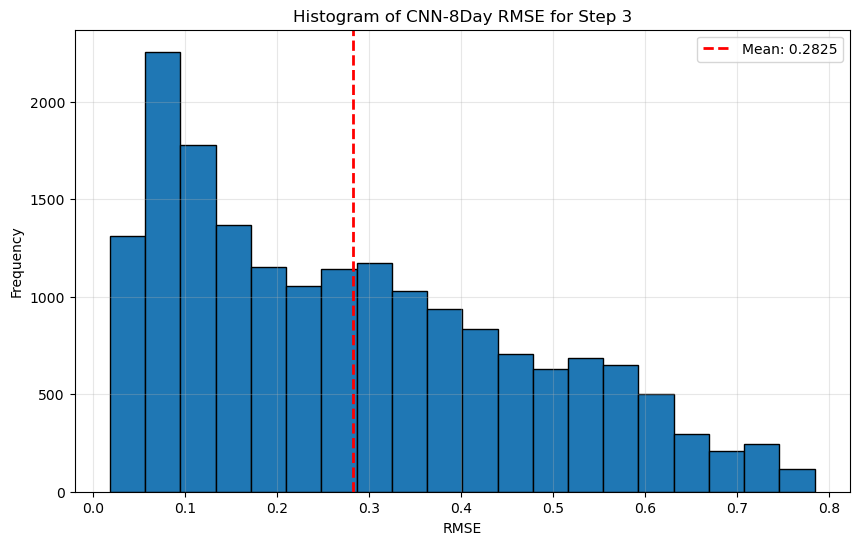

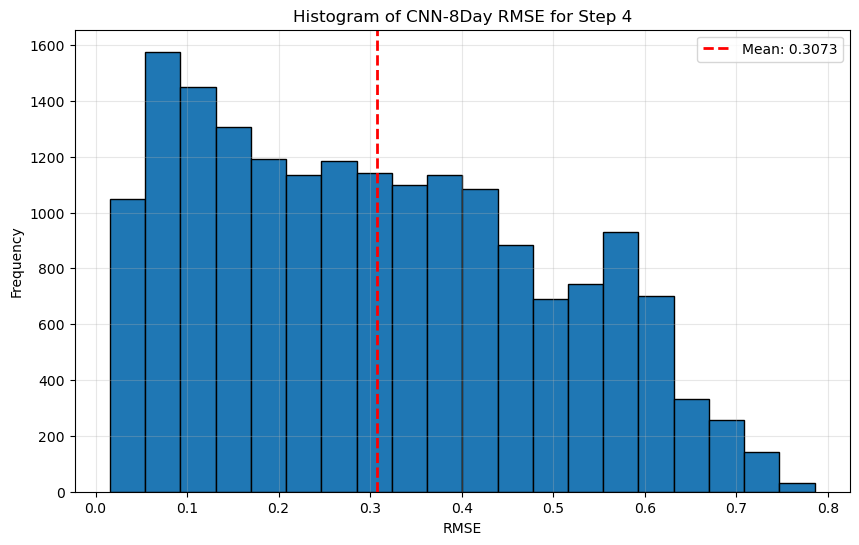

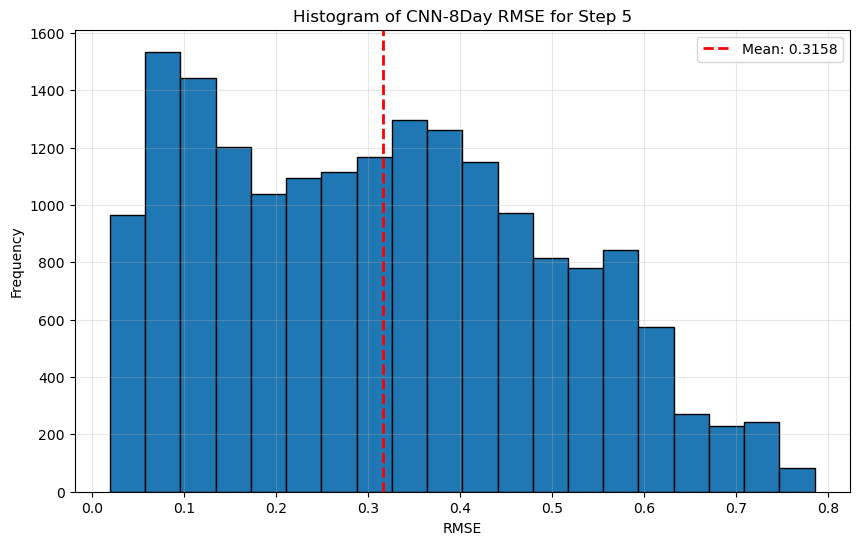

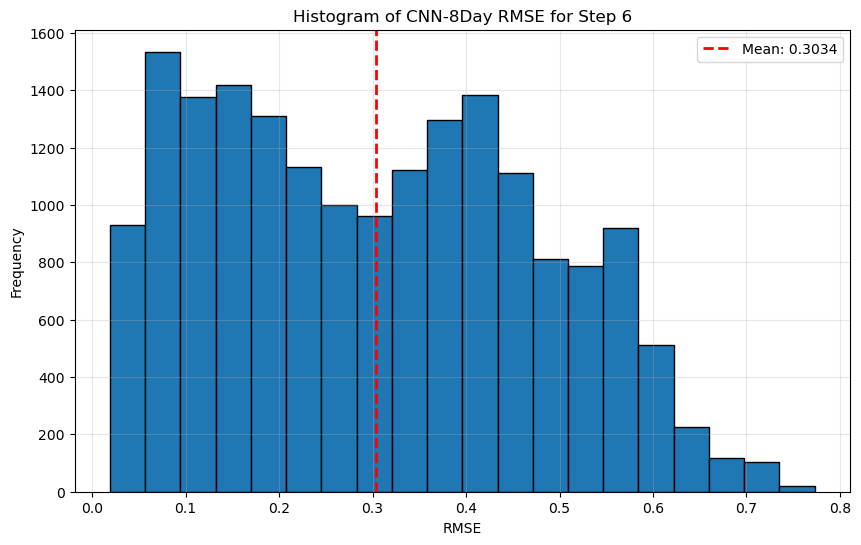

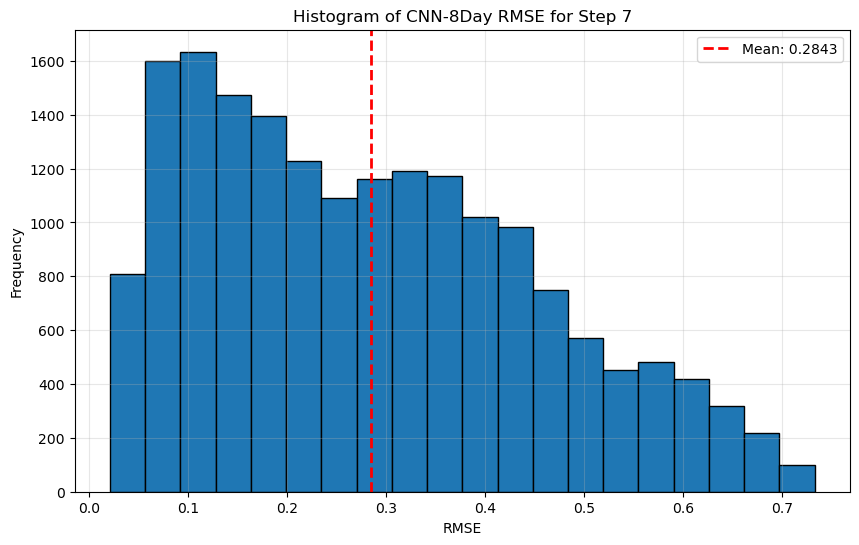

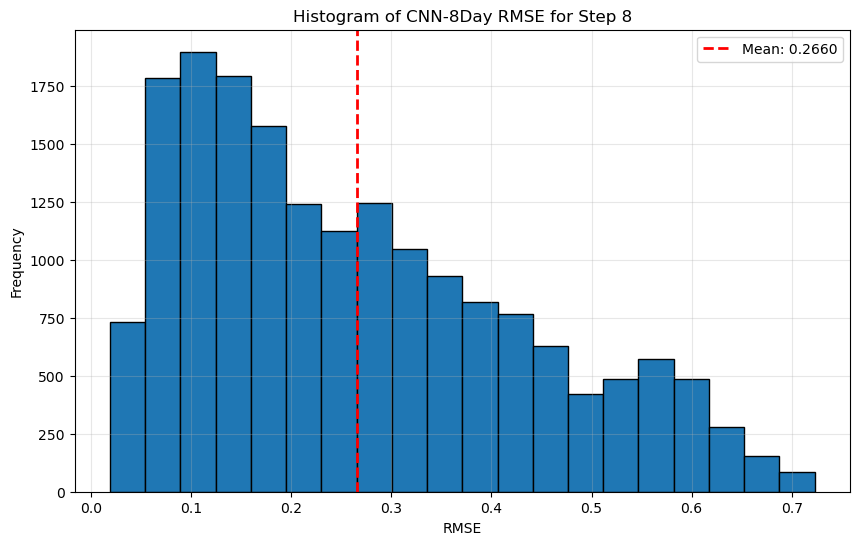

In [23]:
def make_histograms(model,instep):
    csv_files = glob.glob(f"/s/bach/b/class/cs535/cs535a/data/eval_results/{model}/{instep}/*.csv")  # Replace with your actual file path

    df_list = []
    for file in csv_files:
        temp_df = pd.read_csv(file)
        df_list.append(temp_df)

    df = pd.concat(df_list, ignore_index=True)

    for i in range(9):
        if i > 0:
            step_df = df[df['Step'] == i]
            title = f"Histogram of {model}-{instep} RMSE for Step {i}"
            save_file = f"histograms/{model}_{instep}/{model}_{instep}_step{i}.png"
        else:
            step_df = df
            title = f"Histogram of {model}-{instep} RMSE (Total)"
            save_file = f"histograms/{model}_{instep}/{model}_{instep}_total.png"

        plt.figure(figsize=(10, 6))
        plt.hist(step_df['Real_NDVI_RMSE'], bins=20, edgecolor='black')
        plt.title(title)
        plt.xlabel('RMSE')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        
        avg_value=step_df['Real_NDVI_RMSE'].mean()
        
        plt.axvline(avg_value, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {avg_value:.4f}')
        
        plt.legend()

        plt.savefig(save_file)
        plt.show()

make_histograms("CNN", "8Day")



In [29]:
def get_average_rmse(model,instep,step):
    csv_files = glob.glob(f"/s/bach/b/class/cs535/cs535a/data/eval_results/{model}/{instep}/*.csv")  # Replace with your actual file path

    df_list = []
    for file in csv_files:
        temp_df = pd.read_csv(file)
        if step > 0:
            df_list.append(temp_df[temp_df['Step'] == step])
        else:
            df_list.append(temp_df)

    df = pd.concat(df_list, ignore_index=True)
    
    print(f"{model}-{instep}: {df['Real_NDVI_RMSE'].mean()}")

for step in range(9):
    print(f"----------------------step={step}--------------------------")    
    get_average_rmse('CNN', '1Day',step)
    get_average_rmse('CNN', '4Day',step)
    get_average_rmse('CNN', '8Day',step)
    get_average_rmse('LSTM', '1Day',step)
    get_average_rmse('LSTM', '4Day',step)
    get_average_rmse('LSTM', '8Day',step)
    get_average_rmse('LSTM_bidirectional', '1Day',step)
    get_average_rmse('LSTM_bidirectional', '4Day',step)
    get_average_rmse('LSTM_bidirectional', '8Day',step)

----------------------step=0--------------------------
CNN-1Day: 0.25625473176685004
CNN-4Day: 0.24857788778400478
CNN-8Day: 0.274514386492562
LSTM-1Day: 0.30479604841388297
LSTM-4Day: 0.3031193278368827
LSTM-8Day: 0.3175900873132473
LSTM_bidirectional-1Day: 0.32893393017280514
LSTM_bidirectional-4Day: 0.2976989013664673
LSTM_bidirectional-8Day: 0.3154617157074823
----------------------step=1--------------------------
CNN-1Day: 0.1592742011121716
CNN-4Day: 0.16844678109965036
CNN-8Day: 0.1892043693849773
LSTM-1Day: 0.18153115424019908
LSTM-4Day: 0.18931970996153846
LSTM-8Day: 0.23454181355280637
LSTM_bidirectional-1Day: 0.18247141739773196
LSTM_bidirectional-4Day: 0.18901067039060182
LSTM_bidirectional-8Day: 0.23373213045289495
----------------------step=2--------------------------
CNN-1Day: 0.24175722518134235
CNN-4Day: 0.2133692621959631
CNN-8Day: 0.2476860902692904
LSTM-1Day: 0.25227154910760463
LSTM-4Day: 0.24392742905107018
LSTM-8Day: 0.29552615460002213
LSTM_bidirectional-1Day: 0